# Report Generation Example

This notebook demonstrates how to generate professional backtest reports using RustyBT's `ReportGenerator` class.

## Features
- Generate PDF and HTML reports
- Customize report sections
- Add custom charts
- Professional formatting

## Setup

Import required libraries:

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display

from rustybt.analytics import setup_notebook
from rustybt.analytics.reports import ReportConfig, ReportGenerator

# Setup notebook environment
setup_notebook()

✅ Notebook environment configured successfully
   - Async/await support enabled
   - Pandas display options optimized
   - Progress bars configured


## Step 1: Create Sample Backtest Data

For this example, we'll create synthetic backtest results:

In [2]:
# Generate sample data
dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")
np.random.seed(42)

# Simulate returns
returns = np.random.normal(0.0008, 0.015, len(dates))

# Calculate portfolio values
starting_capital = 100000
portfolio_values = starting_capital * np.exp(np.cumsum(returns))

# Create DataFrame
backtest_data = pd.DataFrame(
    {
        "portfolio_value": portfolio_values,
        "returns": returns,
    },
    index=dates,
)

# Display summary

# Preview data
backtest_data.head()

,portfolio_value,returns
2024-01-01,100828.484323,0.008251
2024-01-02,100700.114198,-0.001274
2024-01-03,101764.595814,0.010515
2024-01-04,104199.539475,0.023645
2024-01-05,103917.301929,-0.002712


## Step 2: Generate Basic Report

Create a report with default settings:

In [3]:
# Create report generator
generator = ReportGenerator(backtest_data)

# Generate HTML report
html_output = Path("basic_report.html")
generator.generate_report(html_output, format="html")

### Display Report Inline

View the generated HTML report directly in the notebook:

Metric,Value
Total Return,35.58%
Annual Return,23.31%
Sharpe Ratio,1.04
Sortino Ratio,1.58
Max Drawdown,-19.53%
Calmar Ratio,1.19
Volatility (Annual),22.55%
Stability,0.775
Tail Ratio,1.15
Trading Days,366

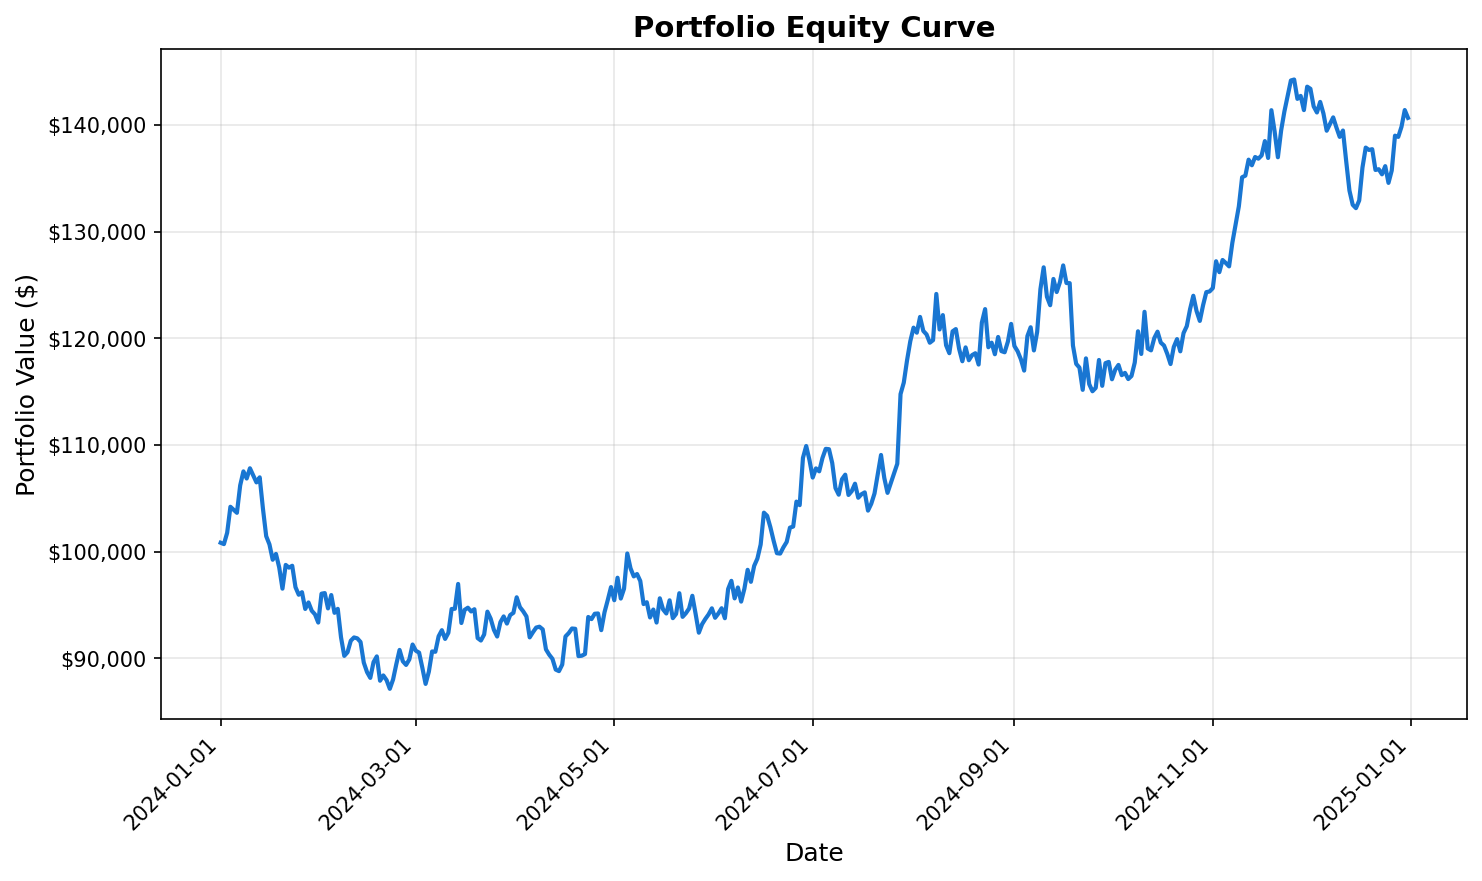
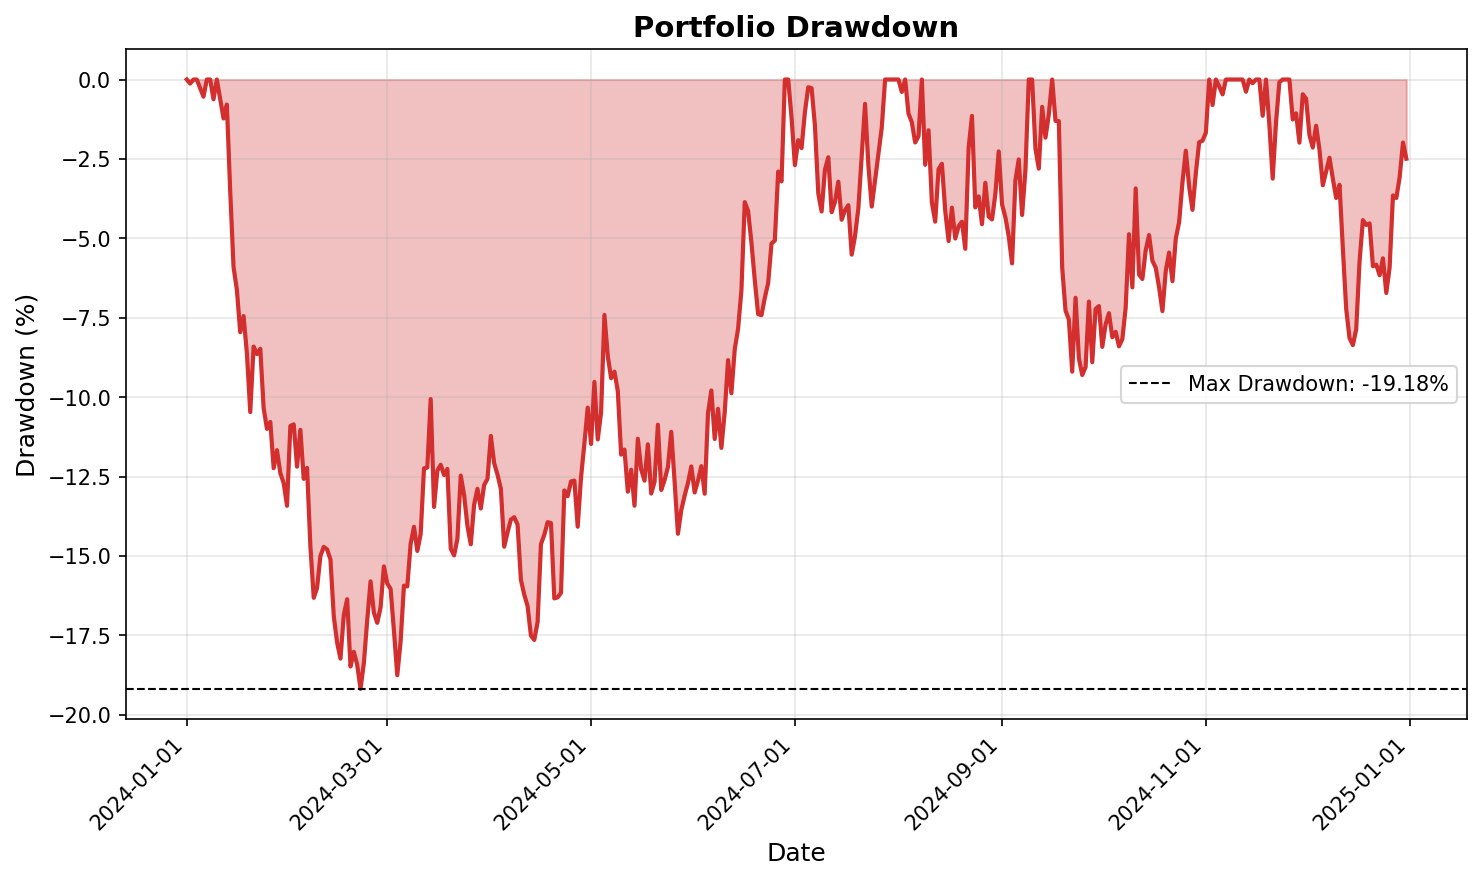
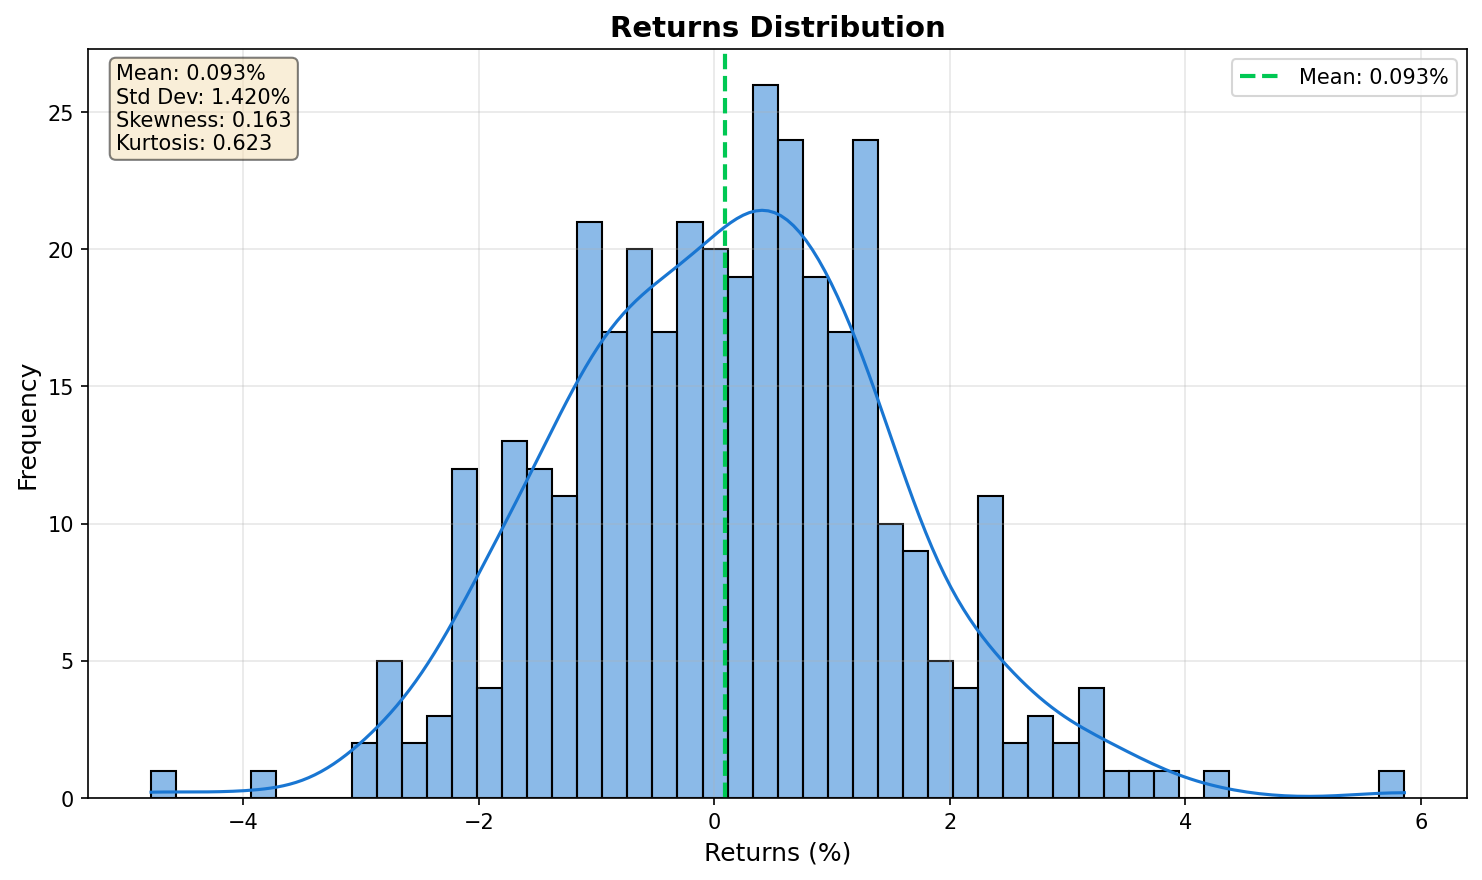
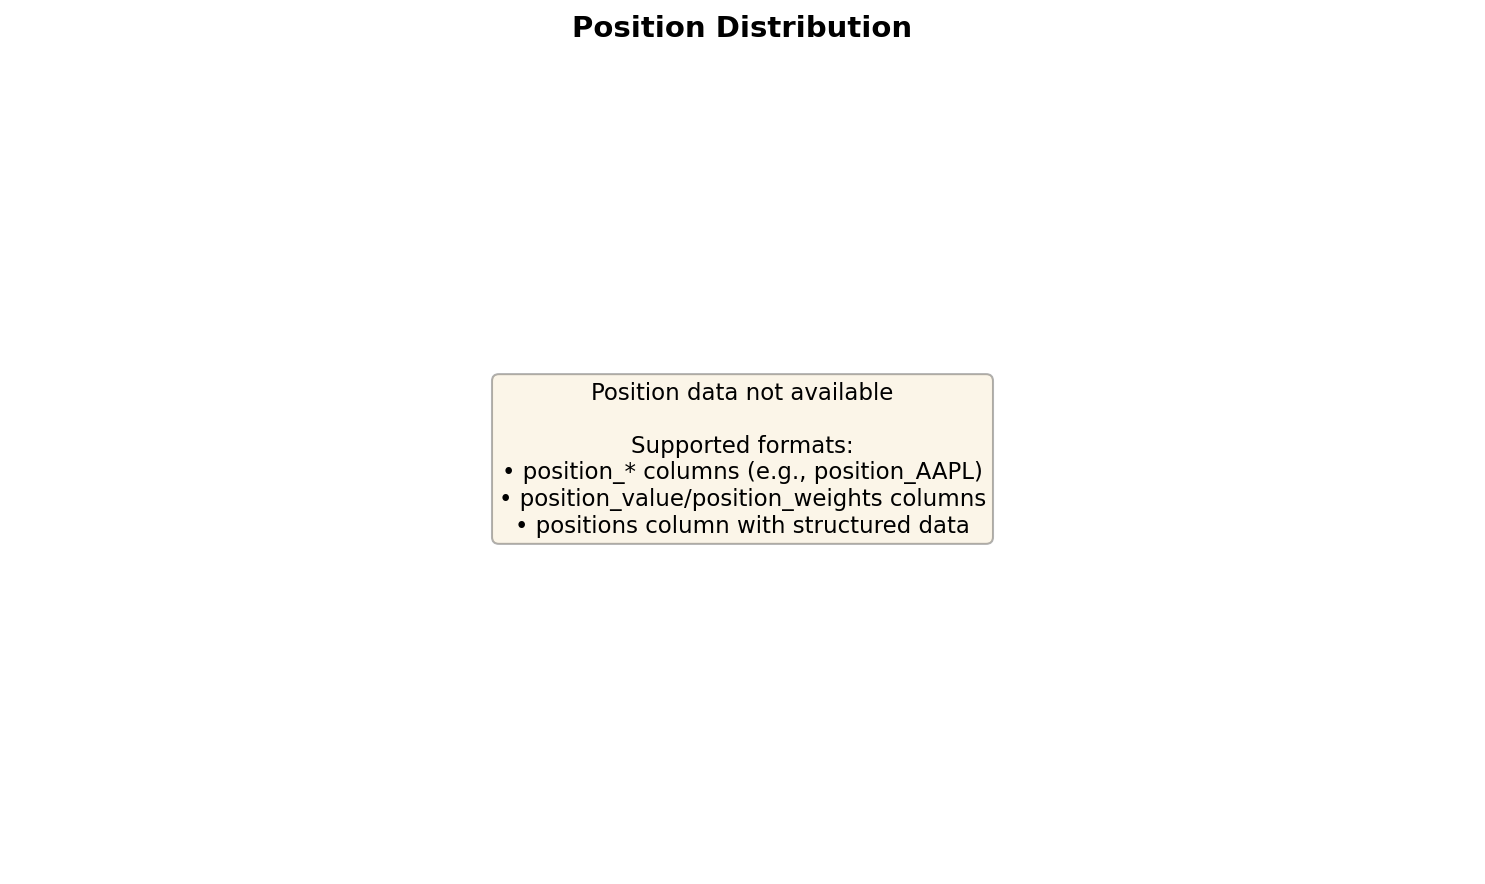

In [4]:
# Display HTML report inline
with open(html_output) as f:
    html_content = f.read()

display(HTML(html_content))

## Step 3: Generate PDF Report

Create a print-ready PDF version:

In [5]:
# Generate PDF report
pdf_output = Path("basic_report.pdf")
generator.generate_report(pdf_output, format="pdf")

## Step 4: Customized Report

Create a report with custom configuration:

In [6]:
# Define custom configuration
custom_config = ReportConfig(
    title="My Trading Strategy",
    subtitle="Momentum-Based Approach",
    include_equity_curve=True,
    include_drawdown=True,
    include_returns_distribution=True,
    include_metrics_table=True,
    include_trade_statistics=True,
    include_position_distribution=False,  # Disable this section
    dpi=200,  # Higher resolution
    figsize=(12, 7),  # Larger charts
)

# Create generator with custom config
custom_generator = ReportGenerator(backtest_data, custom_config)

# Generate customized report
custom_output = Path("custom_report.html")
custom_generator.generate_report(custom_output, format="html")

## Step 5: Add Custom Charts

Extend reports with custom analytics:

In [7]:
def rolling_volatility_chart(data) -> str:
    """Custom chart: Rolling 30-day volatility."""
    import base64
    from io import BytesIO

    fig, ax = plt.subplots(figsize=(10, 6))

    returns = data["returns"]
    rolling_vol = returns.rolling(window=30).std() * np.sqrt(252) * 100

    ax.plot(data.index, rolling_vol, linewidth=2, color="#ff9800")
    ax.set_title("Rolling 30-Day Volatility", fontsize=14, fontweight="bold")
    ax.set_xlabel("Date")
    ax.set_ylabel("Annualized Volatility (%)")
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save as base64
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=150, bbox_inches="tight")
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode("utf-8")
    plt.close(fig)

    return f"data:image/png;base64,{img_base64}"


# Create config with custom chart
advanced_config = ReportConfig(
    title="Advanced Strategy Report",
    subtitle="With Custom Analytics",
    custom_charts=[rolling_volatility_chart],
)

# Generate advanced report
advanced_generator = ReportGenerator(backtest_data, advanced_config)
advanced_output = Path("advanced_report.html")
advanced_generator.generate_report(advanced_output, format="html")

## Step 6: Minimal Report

Create a focused executive summary:

In [8]:
# Minimal configuration
minimal_config = ReportConfig(
    title="Executive Summary",
    subtitle="Key Performance Metrics",
    include_equity_curve=True,
    include_drawdown=False,
    include_returns_distribution=False,
    include_metrics_table=True,
    include_trade_statistics=False,
    include_position_distribution=False,
)

minimal_generator = ReportGenerator(backtest_data, minimal_config)
minimal_output = Path("minimal_report.html")
minimal_generator.generate_report(minimal_output, format="html")

## Summary

You've learned how to:
1. ✅ Generate basic HTML and PDF reports
2. ✅ Customize report configuration
3. ✅ Add custom charts and analytics
4. ✅ Create focused executive summaries

### Generated Files:

In [9]:
generated_files = [
    "basic_report.html",
    "basic_report.pdf",
    "custom_report.html",
    "advanced_report.html",
    "minimal_report.html",
]

print("\nGenerated Report Files:")
print("-" * 60)
for file in generated_files:
    if Path(file).exists():
        size = Path(file).stat().st_size
        print(f"✅ {file:<30} {size:>10,} bytes")
    else:
        print(f"❌ {file:<30} Not found")


Generated Report Files:
------------------------------------------------------------
✅ basic_report.html                 439,258 bytes
✅ basic_report.pdf                   64,848 bytes
✅ custom_report.html                634,530 bytes
✅ advanced_report.html              558,094 bytes
✅ minimal_report.html               127,822 bytes


## Next Steps

- 🔧 Try different `ReportConfig` options
- 📊 Create custom chart functions for your specific metrics
- 📄 Generate reports for your actual backtest results
- 🎨 Customize the HTML template in `rustybt/analytics/templates/report.html`